In [5]:
import pandas as pd

In [8]:
pip install neo4j

  Using cached neo4j-4.4.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


Data is already loaded in the database, we just have to connect to it to ask some queries

In [9]:
from neo4j import GraphDatabase

In [10]:
uri ="bolt://localhost:7687"
user = "neo4j"
password = "mda_2022"

In [11]:
##To see if the connection work
class HelloWorldExample:

    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def print_greeting(self, message):
        with self.driver.session() as session:
            result = session.run("CREATE (a:Greeting) "
                        "SET a.message = $message "
                        "RETURN a.message + ', from node ' + id(a)", message=message)
            name = result.single()[0]  
            print(name)
            
    def delete_greeting(self):
        with self.driver.session() as session:
            result = session.run("MATCH (a:Greeting)"
                        "DETACH DELETE (a)")
            print("done")
    
if __name__ == "__main__":
    greeter = HelloWorldExample(uri,user,password)
    greeter.print_greeting("hello world")
    greeter.delete_greeting()
    greeter.close()

hello world, from node 858
done


In [80]:
class Neo4jConnection:
    
    def __init__(self, uri, user, pwd):
        self.__uri = uri
        self.__user = user
        self.__pwd = pwd
        self.__driver = None
        try:
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)
        
    def close(self):
        if self.__driver is not None:
            self.__driver.close()
        
    def query(self, query, parameters=None, db=None):
        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None
        try: 
            session = self.__driver.session(database=db) if db is not None else self.__driver.session() 
            response = list(session.run(query, parameters))
        except Exception as e:
            print("Query failed:", e)
        finally: 
            if session is not None:
                session.close()
        return response


conn = Neo4jConnection(uri="bolt://localhost:7687", 
                       user="neo4j",              
                       pwd="mda_2022")

In [86]:
query_string= '''
MATCH (s:Speech)
RETURN s.title AS Speech, s.city as City, s.country as Country, s.date as Date, s.content as Content,s.location as Location,s.pages as Nr_Pages,s.highest_speaker_count as NrSpeakers
'''
all_speeches = pd.DataFrame([dict(_) for _ in conn.query(query_string)])
all_speeches.head(5)

,Speech,City,Country,Date,Content,Location,Nr_Pages,NrSpeakers
0,CGI_2013,New York,USA,2013-09-24,Hillary Clinton: Thank you very much. I have t...,Sheraton New York Hotel and Towers,19,10
1,Prayer_Breakfast_2016,Washington D.C.,USA,2016-02-04,"Well, good morning. Giving all praise and hono...",Washington Hilton,7,0
2,Security_Team_Announcement,Chicago,USA,2008-12-01,"Good morning, everybody. I hope you all had a ...",no_specific_location,5,0
3,Cairo_University,Cairo,Egypt,2009-06-04,Thank you so much. Good afternoon. I am honore...,no_specific_location,14,0
4,Umpqua_Community_College_Shootings,Washington D.C.,USA,2015-10-01,There's been another mass shooting in America ...,no_specific_location,4,0


In [87]:
query_string= '''
MATCH (s:Speech)
RETURN s.date as Date, s.finalsentiment as Sentiment, s.title as Title , s.highest_speaker_count as NrSpeakers
ORDER BY s.date
'''
ndf = pd.DataFrame([dict(_) for _ in conn.query(query_string)])
ndf.head(5)

,Date,Sentiment,Title,NrSpeakers
0,2004-07-27,0.653723,2004_DNC_Address,0
1,2005-01-06,0.959119,Senate_Speech_on_Ohio_Electoral_Vote,0
2,2005-04-21,0.806528,Saudi_Arabia_Presser,5
3,2005-06-04,0.535993,Knox_College_Commencement,0
4,2005-10-25,0.678966,Rosa_Parks,0


In [32]:
import seaborn as sns
from datetime import datetime

In [89]:
ndf.Date = [datetime.strptime(d,"%Y-%m-%d").date() for d in ndf.Date]

TypeError: strptime() argument 1 must be str, not datetime.date

<AxesSubplot:xlabel='date', ylabel='sentiment'>

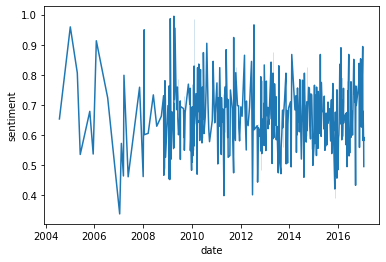

In [90]:
sns.lineplot(x="date",y="sentiment",data= newdataframe,dashes=True)